##### Randam Sample Imputation

In [22]:
import pandas as pd
import numpy as np

In [23]:
df = pd.read_csv('titanic_train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [24]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [25]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [29]:
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [33]:
def impute_nan(df,variable,meadian):
    df[variable+"_mean"]= df[variable].fillna(meadian)
    df[variable+"_random"]=df[variable]
    random_sample = df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+"_random"]=random_sample

In [35]:
meadian = df.Age.median()
meadian

28.0

In [36]:
impute_nan(df,'Age',meadian)

In [37]:
df.head()

,Survived,Age,Fare,Age_mean,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

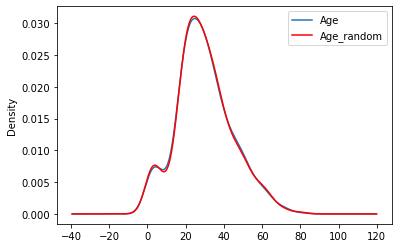

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde', ax=ax)
df.Age_random.plot(kind = 'kde', ax = ax, color = 'Red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')